In [1]:
## -*- coding: cp936 -*-
import numpy as np
import cv2
import matplotlib.pyplot as plt
import h5py
import os,sys
import time
from sklearn.model_selection import train_test_split
import keras
from keras.models import load_model
import pandas as pd
import time

## 列出各資料夾名稱
def label_list(path):
    lists = os.listdir(path)
    lists = pd.DataFrame(lists, columns = ['character'])
    return lists

## 讀取test datas
def load_test_data(path):
    imageList = []
    for file in os.listdir(path):
        file_path = os.path.join(path,file)
        images = cv2.resize(cv2.imread(file_path),(64,64))
        imageList.append(images)
    image = np.array(imageList, dtype='float32') / 255
    return image

## 載入資料檔案
def get_read_main(load = False): 
    if load:
        h5f = h5py.File('dataset.h5','r')
        X_train = h5f['X_train'][:]
        X_test = h5f['X_valid'][:]
        h5f.close()    

        h5f = h5py.File('labels.h5','r')
        y_train = h5f['y_train'][:]
        y_test = h5f['y_valid'][:]
        h5f.close()         
    print("Train", X_train.shape, y_train.shape)
    print("Test", X_test.shape, y_test.shape)
    return X_train, X_test, y_train, y_test


if __name__ == '__main__':
    X_train, X_test, y_train, y_test = get_read_main(load=True)
    lists = label_list("./Train/characters-20/")
    images = load_test_data('./Test/test/')
    models = load_model('./my_model.h5')
    y_pred = models.predict_classes(X_test)

Using TensorFlow backend.


Train (15638, 64, 64, 3) (15638, 20)
Test (3910, 64, 64, 3) (3910, 20)
3910/3910 [==============================] - 6s     


# 畫出混淆矩陣

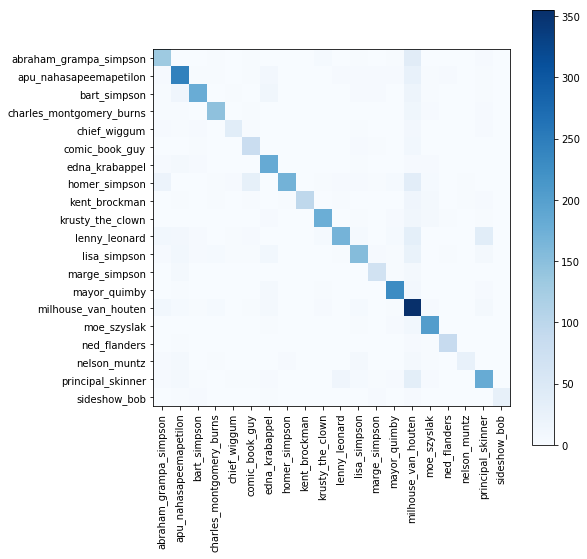

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline


plt.figure(figsize=(8,8))
cnf_matrix = sklearn.metrics.confusion_matrix(np.where(y_test > 0)[1], y_pred)

## 各資料夾名稱
classes = list(lists['character'])
plt.imshow(cnf_matrix, interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)